## Связь с биологией

Наше зрительное восприятие устроено следующим образом:

*  Каждый фоторецептор на сетчатке нашего глаза (палочка или колбочка) реагирует только на свет, попавший на него.

* Сигнал от фоторецептора попадает на нейрон следующего уровня (биполярная клетка). Этот нейрон уже соединен с несколькими фоторецепторами. Область, в которой они локализованы, называется **рецептивным полем**.
Нейрон возбуждается при определенной комбинации сигналов от связанных с ним рецепторных клеток. По сути, он реагирует на простой, локально расположенный паттерн.

* Клетки уровнем выше (ганглиозные) собирают информацию с нескольких близко расположенных биполярных клеток и активируются при уникальной комбинации сигналов с них. Их рецептивное поле больше, и паттерны, на которые они реагируют, сложнее.

* Далее сигнал предается в мозг, но там связи между нейронами продолжают оставаться иерархическими. Рецептивное поле нейронов растет, и паттерны, на которые они активируются, становятся все более и более сложными.

**Рецептивное поле** нейрона — это участок с рецепторами, с которых он прямо или опосредованно, через другие нейроны, получает информацию.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/brain.png" width="1000">


## Ядра свёртки

Та же идея воплощена в свёрточных нейронных сетях. Формируются свёрточные слои, которые представляют собой матрицы (ядра свёртки), которые "проходят" по всему изображению и извлекают некие шаблоны:

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/convolution_with_filter.gif" width="1000">

Последовательность действий при применении ядра свёртки размером $3 \times 3$:

*  Для каждого пикселя исходного изображения берем окрестность размером $3 \times 3$.
*  Значение каждого пикселя из этой окресности умножаем на соответствующее значение из массива kernel (тоже $3 \times 3$).
*  Затем суммируем все 9 результатов, получившееся число записываем в новый массив.
* В результате получаем сглаженное изображение.

<img src = "https://neerc.ifmo.ru/wiki/images/7/71/Convolution_example.png" width="1500">

Записать результат применения фильтра 

\begin{figure}[ht!]
\centering
\begin{minipage}{3cm}
    \begin{tabular}{|c|c|c|}
        \hline
        1 & 0 & -1 \\
        \hline
        1 & 0 & -1 \\
        \hline
        1 & 0 & -1 \\
        \hline
    \end{tabular}
\end{minipage}
\text{к изображению} \qquad
\begin{minipage}{3cm}
    \begin{tabular}{|c|c|c|c|}
        \hline
        7 & 2 & 3 & -3 \\
        \hline
        4 & -5 & 3 & 2 \\
        \hline
        1 & 2 & -1 & 3 \\
        \hline
        2 & -2 & 1 & -3 \\
        \hline
    \end{tabular}
\end{minipage}
\end{figure}

Ответ:

Задание: реализовать функцию применения ядра свёртки (kernel) к изображению (img).

In [1]:
import torch
from torch import nn

In [2]:
from skimage import data


img_cat = data.cat().mean(axis=2).astype("int32")

img_cat

array([[122, 122, 120, ...,  28,  28,  28],
       [125, 124, 122, ...,  29,  29,  30],
       [128, 127, 125, ...,  31,  32,  33],
       ...,
       [ 60,  73, 100, ..., 151, 151, 151],
       [ 93, 104,  97, ..., 146, 146, 147],
       [104,  90,  88, ..., 141, 141, 142]], dtype=int32)

In [3]:
img_cat.shape

(300, 451)

In [4]:
import numpy as np

def apply_filter(img, kernel):
    h, w = img.shape  
    kh, kw = kernel.shape  
    out = np.zeros((h - kh + 1, w - kw + 1)) # понять размерность выходной матрицы

    for i in range(h - kh + 1):
        for j in range(w - kw + 1):
            patch = img[i:i+kh, j:j+kw]  # получить патч нужной размерности
            new_pixel = np.multiply(kernel, patch).sum()  # произвести операции поэлементного умножения с последующим сложением
            out[i, j] = new_pixel  # записать в массив, которым будет представлено выходное изображение

    return out


Проверим себя применением фильтра Собеля, который отвечает за перепад яркости по вертикали (грубо говоря, выделяет горизонтальные линии на изображении):

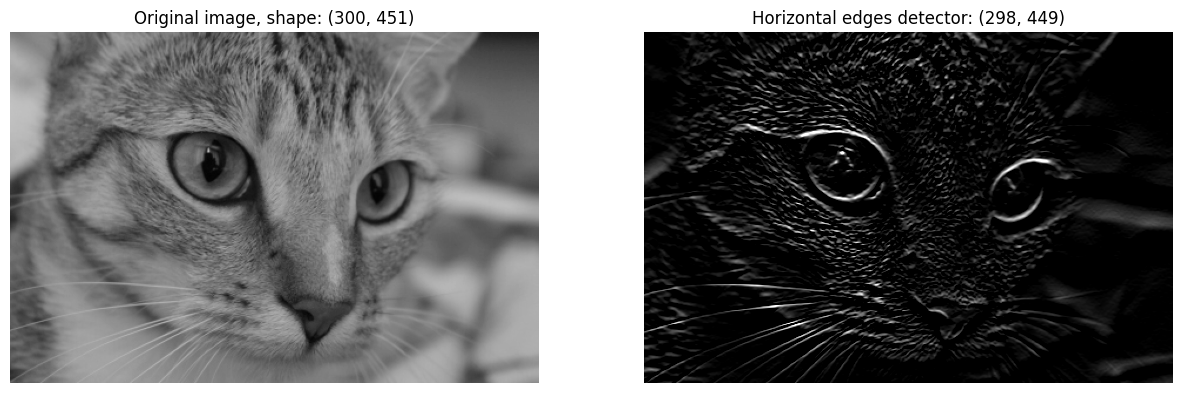

In [5]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

img_cat = data.cat().mean(axis=2).astype("int32")

sobel_y_kernel = torch.tensor([[ 1.0,  2.0, 1.0 ],
                               [ 0.0,  0.0, 0.0 ],
                               [-1.0, -2.0, -1.0]])

x_edges = apply_filter(img_cat, sobel_y_kernel)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(img_cat, cmap="gray", vmin=0, vmax=255)
axes[1].imshow(x_edges, cmap="gray", vmin=0, vmax=255)
axes[0].set(title=f"Original image, shape: {img_cat.shape}")
axes[1].set(title=f"Horizontal edges detector: {x_edges.shape}")
axes[0].axis("off")
axes[1].axis("off")
plt.show()

Задание: применить фильтр размытия (матрица $3 \times 3$, заполненая одинаковыми значениями 1/9) к изображению астронавта.

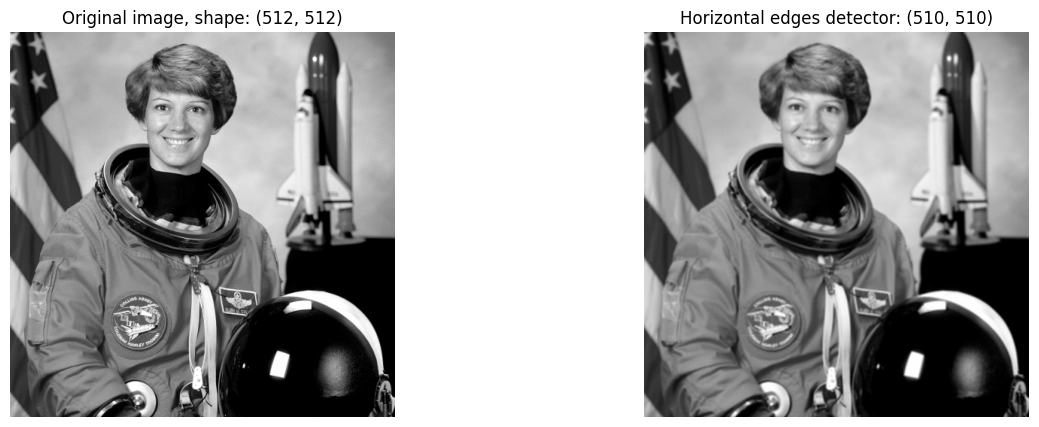

In [7]:
## WRITE YOUR CODE HERE

img_astro = data.astronaut().mean(axis=2).astype("int32")

sobel_y_kernel = torch.ones(3, 3) / 9

x_edges = apply_filter(img_astro, sobel_y_kernel)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(img_astro, cmap="gray", vmin=0, vmax=255)
axes[1].imshow(x_edges, cmap="gray", vmin=0, vmax=255)
axes[0].set(title=f"Original image, shape: {img_astro.shape}")
axes[1].set(title=f"Horizontal edges detector: {x_edges.shape}")
axes[0].axis("off")
axes[1].axis("off")
plt.show()

Применение различных видов свёртки к изображениям можно посмотреть [на сайте](https://setosa.io/ev/image-kernels/).

## Padding (расширение)

Заметим, что при уменьшении размера представлений, пиксели, находящиеся около краёв, участвуют в значительно меньшем количестве свёрток, чем пиксели в середине, хотя информация в них не обязательно менее ценна, чем информация из центральных пикселей. К примеру, пиксель в верхнем левом углу представления вне зависимости от размера фильтра будет принимать участие лишь в одной свёртке, и информация о нём будет сохранена лишь в верхнем левом углу нового представления.

Для борьбы с описанной выше проблемой применяется *набивка/дополнение* входного тензора (англ. *padding*). В ходе него ширина и высота тензора увеличиваются за счёт приписывания столбцов и строк с некими значениями. К примеру, на изображении ниже перед свёрткой ядром размера $3\times3$ был применён padding нулями.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/padding.png" width="1000">

На примере убедимся, что это позволит нам сохранить пространственные размерности тензоров.

In [8]:
img = torch.randn((1, 1, 5, 5))  # create random image BCHW
print(f"Original tensor:\nshape:{img.shape}")
conv_3 = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
conved_3 = conv_3(img)
print("Shape after convolution layer(kernel 3x3):", conved_3.shape)

Original tensor:
shape:torch.Size([1, 1, 5, 5])
Shape after convolution layer(kernel 3x3): torch.Size([1, 1, 3, 3])


Карта признаков имеет размерность, меньшую чем входное изображение. После добавления padding:


In [9]:
# add zeros to image manually
padded_img = torch.zeros((1, 1, 7, 7))  # create zeros array to insert image in center
padded_img[:, :, 1:-1, 1:-1] += img  # insert image, we get image arounded by zeros
print(f"\nPadded tensor:\nshape:{padded_img.shape}:\n {padded_img}")

conved_pad_3 = conv_3(padded_img)
print("\n\nPadded shape:", padded_img.shape)
print("Shape after convolution with padding(kernel 3x3):", conved_pad_3.shape)


Padded tensor:
shape:torch.Size([1, 1, 7, 7]):
 tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  1.3579, -1.1779,  0.4189, -0.1251, -0.2031,  0.0000],
          [ 0.0000, -1.4435,  0.5116,  0.7900,  1.5726, -0.3346,  0.0000],
          [ 0.0000,  0.3220, -1.4788,  0.2316, -1.7440,  0.1372,  0.0000],
          [ 0.0000, -0.9490, -0.3246,  0.8669,  0.9252,  0.0464,  0.0000],
          [ 0.0000,  0.4573, -0.1728, -1.1950,  0.2721,  2.0732,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]]])


Padded shape: torch.Size([1, 1, 7, 7])
Shape after convolution with padding(kernel 3x3): torch.Size([1, 1, 5, 5])


## Stride (шаг свёртки)

До этого мы двигали фильтр на один пиксель, то есть перемещались с шагом (stride) один.

Если двигать фильтр с большим шагом, то размер выходной карты признаков (feature map) будет уменьшаться кратно шагу, и рецептивные поля нейронов будут расти быстрее.

Для изменения шага свертки в конструкторе [nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) есть параметр `stride`.

In [10]:
dummy_input = torch.randn(1, 1, 5, 5)
conv_s1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=(1, 1))
conv_s2 = nn.Conv2d(1, 3, 3, stride=2)  # bypass par. names, stride = (2, 2)

out_stride1 = conv_s1(dummy_input)
out_stride2 = conv_s2(dummy_input)

print("Out with stride 1", out_stride1.shape)
print("Out with stride 2", out_stride2.shape)

Out with stride 1 torch.Size([1, 3, 3, 3])
Out with stride 2 torch.Size([1, 3, 2, 2])


<center><img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/convolution_parameter_stride.gif" width="350"></center>

Свёртка массива $5\times5$ фильтром размером $3\times3$ с шагом $2$ по вертикали и горизонтали.

При этом важно заметить, что в некоторых случаях часть данных может не попасть в свёртку. К примеру, при $N = 7,\, K = 3,\, S = 3$. В данном случае, $\displaystyle N' = 1 + \frac{7 - 3}{3} = 2\frac13.$ В подобных ситуациях часть изображения не захватывается, в чём мы можем убедиться на наглядном примере:

In [11]:
# Create torch tensor 7x7
# fmt: off
input = torch.tensor([[[[1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99],
                        [1, 1, 1, 1, 1, 1, 99]]]], dtype=torch.float)
# fmt: on

print(f"input shape: {input.shape}")

conv = torch.nn.Conv2d(
    in_channels=1,  # Number of channels
    out_channels=1,  # Number of filters
    kernel_size=3,
    stride=3,
    bias=False,  # Don't use bias
)
conv.weight = torch.nn.Parameter(
    torch.ones((1, 1, 3, 3))
)  # Replace random weights to ones
out = conv(input)

print(f"out shape: {out.shape}")
print(f"out:\n{out}")

input shape: torch.Size([1, 1, 7, 7])
out shape: torch.Size([1, 1, 2, 2])
out:
tensor([[[[9., 9.],
          [9., 9.]]]], grad_fn=<ConvolutionBackward0>)


Видно, что столбец с числами 99 просто не попал в свертку.
Поэтому на практике подбирают padding таким образом, чтобы при `stride = 1`  размер карты признаков на выходе был равен входу, а затем делают сверку со `stride = 2`.

Казалось бы, с увеличением шага $S$ рецептивное поле не выросло &mdash; как увеличивалось с $1$ до $K$, так и увеличивается. Однако обратим внимание на иное: если раньше размерность $N$ становилась $N - F + 1$, то теперь она станет $\displaystyle 1 + \frac{N-F}{S}$. В результате, если раньше следующий фильтр с размером $K'$ имел рецептивное поле в $\displaystyle N \cdot \frac{K'}{N'} = N \cdot \frac{K'}{N - F + 1}$, то теперь $\displaystyle N \cdot \frac{K'}{N'} = N \cdot \frac{K'}{1 + \frac{N-F}{S}}$. Понятно, что $\displaystyle \frac{K'}{N - F + 1} \leq \frac{K'}{1 + \frac{N-F}{S}}$, потому рецептивное поле каждого нейрона увеличивается.



## Pooling (уплотнение)

Другим вариантом стремительного увеличения размера рецептивного поля является использование дополнительных слоёв, требующих меньшее количество вычислительных ресурсов. Слои субдискретизации прекрасно выполняют эту функцию: подобно свёртке, производится разбиение изображения на небольшие сегменты, внутри которых выполняются операции, не требующие использования обучаемых весов. Два популярных примера подобных операций: получение максимального значения (max pooling) и получение среднего значения (average pooling).


Аналогично разбиению на сегменты при свёртке, слои субдискретизации имеют два параметра: размер фильтра $K$ (то есть, каждого из сегментов) и шаг $S$ (stride). Аналогично свёрткам, при применении субдискретизации формула размера стороны будет $\displaystyle N' = 1+ \frac{N-K}{S}.$

Ниже приведён пример использования операций max pooling и average pooling при обработке массива.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/subdiscretization_pooling.png" width="1000">

Реализуем это в коде:

In [12]:
input = torch.tensor([[[[1, 1, 2, 4],
                        [5, 6, 7, 8],
                        [3, 2, 1, 0],
                        [1, 2, 3, 4]]]], dtype=torch.float)

max_pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
avg_pool = torch.nn.AvgPool2d(kernel_size=2, stride=2)

print("Input:\n", input)
print("Max pooling:\n", max_pool(input))
print("Average pooling:\n", avg_pool(input))

Input:
 tensor([[[[1., 1., 2., 4.],
          [5., 6., 7., 8.],
          [3., 2., 1., 0.],
          [1., 2., 3., 4.]]]])
Max pooling:
 tensor([[[[6., 8.],
          [3., 4.]]]])
Average pooling:
 tensor([[[[3.2500, 5.2500],
          [2.0000, 2.0000]]]])


## Карта признаков

Ключевое отличие между линейным слоем и свёрткой заключается в том, что каждый нейрон линейного слоя получает на вход всё изображение сразу, а свёртка &mdash; небольшие фрагменты.

Так как при свертке для каждого фрагмента получаем свой отклик (признак), то для всего изображения получим уже массив признаков (feature map).

Свертки можно сравнить с лампочками, которые "загораются" сильнее, если на изображении есть определенный паттерн.

На картах активации вы НЕ найдете никакого "понятного" рисунка: они есть индикаторы наличия некоего паттерна на картинке.


Weights shape torch.Size([64, 3, 11, 11])
Output is CxHxW image torch.Size([3, 106, 106])


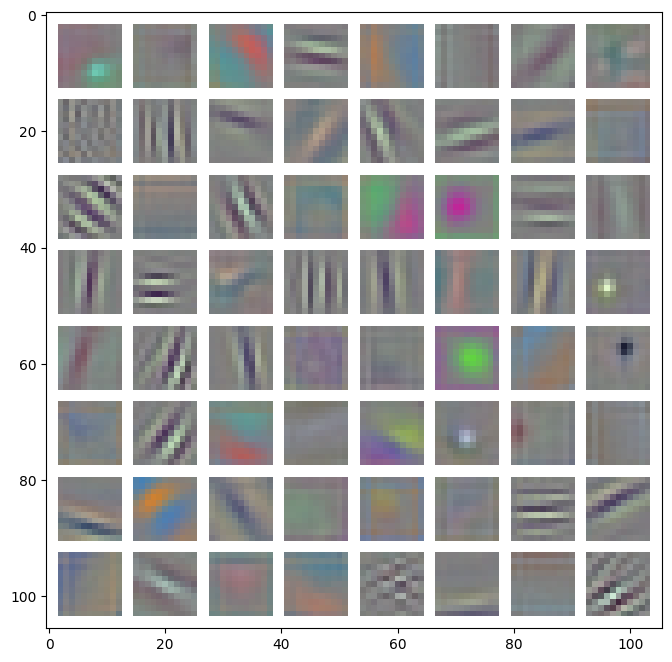

In [13]:
from torchvision import models
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

alexnet = models.alexnet(weights="AlexNet_Weights.DEFAULT")
weight_tensor = alexnet.features[0].weight.data  # extract weights
print("Weights shape", weight_tensor.shape)

img_grid = utils.make_grid(
    (weight_tensor + 1) / 2, pad_value=1
)  # combine weights from all channel into table, note remapping to (0,1) range
print("Output is CxHxW image", img_grid.shape)

plt.rcParams["figure.figsize"] = (8, 8)
plt.imshow(
    np.transpose(img_grid, (1, 2, 0))
)  # change channel order for compability with numpy & matplotlib
plt.show()

Карта признаков после применения функции активации может быть передана на вход следующей операции свёртки.

Заметим, что после свёртки ширина $W_{out}$ и высота $H_{out}$ **карты признаков** будут отличаться от **пространственных размерностей** $W_{in}$ и $H_{in}$ исходного тензора. К примеру, при обработке трёхканального тензора размера $32 \times 32$ ядром размера $5 \times 5$, можно будет произвести лишь $27$ сдвигов $(32 - 5)$ по вертикали и столько же по горизонтали. Но при этом размер итоговой карты признаков будет равен $28 \times 28$, поскольку первый ряд (либо столбец) можно получить без сдвигов по вертикали либо горизонтали, соответственно. При повторном применении фильтра размер каждой из сторон уменьшится ещё на $4$.

Итоговое значение $N'$ пространственной размерности $N$ для квадратного фильтра $K \times K$ фильтра $F$ вычисляется по следующей формуле: $$\large N' = N - K + 1$$.

<img src ="https://edunet.kea.su/repo/EduNet-content/L06/out/decrease_size_of_image_after_convolution.png" width="2000">


Разберём на примере, как рассчитывать входные и выходные значения для каждого слоя свёрточной нейронной сети, изображённой на рисунке выше:

* входное изображение из набора данных СIFAR10 представляет собой 3 матрицы (по одной для каждого цвета red, green, blue) размером $32 \times 32$. То есть получаем тензор размерности $(3, 32, 32)$;

* если применить к нему 6 фильтров размерности $5 \times 5$, то на выходе получаем 6 матриц (одна матрица для одного фильтра) размером $(32-5+1) \times (32-5+1) = 28 \times 28$;

* теперь применим 10 фильтров размерности $5 \times 5$, тогда на выходе получаем 10 матриц (одна матрица для одного фильтра) размером $(28-5+1) \times (28-5+1) = 24 \times 24$.

Если бы мы после применения свёртки применили maxpooling размерности $2 \times 2$, то каждое измерение матрицы необходимо поделить на 2, получим тензор размерности $14 \times 14$.

Задание. Дополнить код свёрточной нейронной сети для набора данных MNIST необходимыми размерностями:

In [14]:
import torch
from torch import nn
input = torch.randn((1, 1, 28, 28))   # like MNIST

model = torch.nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5),  
    # after conv shape: [1, 3, 24, 24]
    nn.ReLU(),  
    # after ReLU shape: [1, 3, 24, 24]
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3),  
    # after conv shape: [1, 6, 22, 22]
    nn.ReLU(), 
    # after ReLU shape: [1, 6, 22, 22]
    nn.Flatten(), 
    # after Flatten shape: [1, 2904]
    nn.Linear(2904, 100),
    nn.ReLU(),  
    # after ReLU shape: [1, 100]
    nn.Linear(100, 10),  # 10 classes, like MNIST
)

out = model(input)
print(f"out shape: {out.shape}")
# out shape: [1, 10]


out shape: torch.Size([1, 10])


Задание. Дополнить код свёрточной нейронной сети для набора данных CIFAR10 необходимыми размерностями:

In [72]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)       # 3 входных канала (RGB), 6 выходных, свёртка 5X5
        self.pool = nn.MaxPool2d(2, 2)        # MaxPooling 2X2
        self.conv2 = nn.Conv2d(6, 16, 5)      # 16 выходных каналов, свёртка 5X5
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 120 выходных значений
        self.fc2 = nn.Linear(120, 84)         # 84 выходных значений
        self.fc3 = nn.Linear(84, 10)          # 10 выходных значений (соответствует числу классов в CIFAR10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        print(x.shape)
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


In [76]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader


data_CIFAR10 = datasets.CIFAR10(
    root="./CIFAR10", download=True, transform=ToTensor()
)


dataloader_CIFAR = DataLoader(data_CIFAR10, batch_size=8, shuffle=True)

Files already downloaded and verified


In [77]:
data_CIFAR10[0][0].shape

torch.Size([3, 32, 32])

In [79]:
imgs, labels = next(iter(dataloader_CIFAR))

net(imgs)

torch.Size([8, 6, 14, 14])
torch.Size([8, 16, 5, 5])
torch.Size([8, 400])


tensor([[ 0.0115,  0.0703,  0.0655,  0.0521, -0.1529,  0.0034, -0.0300, -0.1275,
          0.0632,  0.0668],
        [ 0.0091,  0.0702,  0.0668,  0.0534, -0.1494,  0.0042, -0.0271, -0.1289,
          0.0559,  0.0682],
        [ 0.0081,  0.0665,  0.0582,  0.0506, -0.1534,  0.0025, -0.0229, -0.1256,
          0.0625,  0.0651],
        [ 0.0083,  0.0685,  0.0582,  0.0488, -0.1514,  0.0036, -0.0242, -0.1255,
          0.0664,  0.0709],
        [ 0.0064,  0.0677,  0.0602,  0.0496, -0.1536,  0.0037, -0.0236, -0.1272,
          0.0635,  0.0666],
        [ 0.0061,  0.0672,  0.0588,  0.0476, -0.1551,  0.0021, -0.0178, -0.1209,
          0.0659,  0.0693],
        [ 0.0046,  0.0709,  0.0598,  0.0489, -0.1506,  0.0006, -0.0243, -0.1270,
          0.0675,  0.0656],
        [ 0.0072,  0.0692,  0.0599,  0.0502, -0.1540,  0.0037, -0.0221, -0.1245,
          0.0638,  0.0675]], grad_fn=<AddmmBackward0>)

Задание. Написать класс Net со следующей архитектурой:

Net( <br>
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1)) <br> 
  (conv2): Conv2d(???, 16, kernel_size=(5, 5), stride=(1, 1)) <br>
  (fc1): Linear(in_features=???, out_features=120, bias=True) <br>
  (fc2): Linear(in_features=???, out_features=84, bias=True)  <br>
  (fc3): Linear(in_features=???, out_features=10, bias=True)  <br>
)

In [80]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, 1)       # 3 входных канала, 6 выходных, свёртка 5Х5
        self.conv2 = nn.Conv2d(6, 16, 5, 1)      # 16 выходных каналов, свёртка 5Х5
        self.fc1 = nn.Linear(16 * 5 * 5, 120)            # 120 выходных значений
        self.fc2 = nn.Linear(120, 84)            # 84 выходных значений
        self.fc3 = nn.Linear(84, 10)            # 10 выходных значений

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Чтобы посмотреть архитектуру, нужно просто создать экземпляр класса и напечатать его:
net = Net()
print(net)
Тогда получим название класса, какждого слоя и парамерты каждого слоя.

In [81]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Задание. Написать класс CNN_model со следующей архитектурой:

CNN_model( <br>
  (conv_stack): Sequential( <br> 
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) <br>
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) <br>
    (2): ReLU() <br>
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) <br> 
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) <br>
    (5): ReLU() <br>
    (6): Flatten(start_dim=1, end_dim=-1) <br>
    (7): Linear(in_features=1568, out_features=100, bias=True) <br>
    (8): ReLU() <br> 
    (9): Linear(in_features=100, out_features=10, bias=True) <br>
  ) <br>
)

In [82]:
import torch.nn as nn

class CNN_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Flatten(start_dim=1, end_dim=-1),
            nn.Linear(1568, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        return self.conv_stack(x)

model = CNN_model()
print(model)


CNN_model(
  (conv_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1568, out_features=100, bias=True)
    (8): ReLU()
    (9): Linear(in_features=100, out_features=10, bias=True)
  )
)


Параметр dilation отвечает за расстояние между точками ядра, наглядное изображение для лучшего понимания: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

![Dilation](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/dilation.gif "dila")